In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [2]:
# Cargar el dataset original
df = pd.read_csv('./Clasificacion_banco.csv')

# Convertir las variables categóricas en variables numéricas con One-Hot Encoding
X = df.drop('not.fully.paid', axis=1)  # Características (X)
y = df['not.fully.paid']  # Variable objetivo (y)

# Aplicar One-Hot Encoding a las variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mostrar la forma de los conjuntos de entrenamiento y prueba para verificar
print(f"Conjunto de entrenamiento: {X_train.shape}, Conjunto de prueba: {X_test.shape}")


Conjunto de entrenamiento: (6704, 18), Conjunto de prueba: (2874, 18)


## Cargar el dataset y preparar las variables categóricas

En este bloque de código:
1. **Cargamos el dataset** desde un archivo CSV utilizando `pandas` y asignamos las características a la variable `X` y la variable objetivo (si no pagó) a `y`.
2. **One-Hot Encoding**: Aplicamos One-Hot Encoding para convertir las variables categóricas en variables numéricas que los algoritmos de machine learning puedan procesar. Utilizamos `pd.get_dummies` para esta transformación, eliminando la primera columna con `drop_first=True` para evitar multicolinealidad.
3. **Dividimos el dataset** en un conjunto de entrenamiento y otro de prueba, usando un 70% de los datos para el entrenamiento (`X_train` y `y_train`) y el 30% restante para la prueba (`X_test` y `y_test`). Usamos `train_test_split` de `scikit-learn` para realizar la división.
4. **Estandarización**: Utilizamos `StandardScaler()` para escalar las características en ambos conjuntos, de manera que todas las variables tengan una media de 0 y una desviación estándar de 1. Esto es importante para algoritmos como QDA, LDA, y SVM que son sensibles a la escala de los datos.
5. Finalmente, verificamos la forma de los conjuntos de datos impresos para asegurarnos de que la separación fue exitosa.


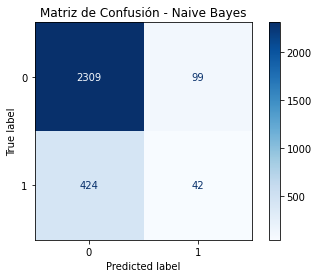

Informe de Clasificación - Naive Bayes
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2408
           1       0.30      0.09      0.14       466

    accuracy                           0.82      2874
   macro avg       0.57      0.52      0.52      2874
weighted avg       0.76      0.82      0.78      2874



In [3]:
# Crear el modelo Naive Bayes
model_nb = GaussianNB()

# Entrenar el modelo con el conjunto de entrenamiento
model_nb.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_nb = model_nb.predict(X_test)

# Generar la matriz de confusión y almacenarla
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot(cmap='Blues')

# Mostrar la matriz de confusión
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()

# Generar y almacenar el informe de clasificación
nb_report = classification_report(y_test, y_pred_nb)
print("Informe de Clasificación - Naive Bayes")
print(nb_report)

# Guardar la matriz de confusión para análisis posterior
nb_confusion_matrix = cm_nb




## Entrenamiento del modelo Naive Bayes

En este bloque de código, entrenamos un modelo **Naive Bayes (GaussianNB)** y evaluamos su rendimiento con una **matriz de confusión** y un **informe de clasificación**. Almacenamos estos resultados en variables para analizarlos posteriormente.

1. **Entrenamiento del modelo**: 
   - Creamos una instancia del modelo `GaussianNB()` y entrenamos el modelo con los datos de entrenamiento.

2. **Predicciones**: 
   - Realizamos predicciones en el conjunto de prueba con el modelo entrenado.

3. **Matriz de Confusión**: 
   - Generamos y visualizamos la matriz de confusión usando `confusion_matrix()` y `ConfusionMatrixDisplay()`. La matriz se almacena en la variable `nb_confusion_matrix` para un análisis posterior.

4. **Informe de Clasificación**: 
   - Generamos y almacenamos el informe de clasificación en la variable `nb_report`. Este informe incluye las métricas de precisión, recall, f1-score y soporte para cada clase.


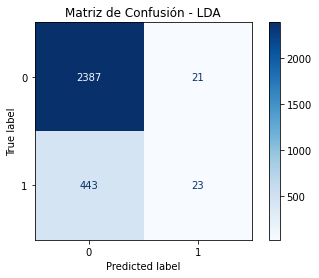

Informe de Clasificación - LDA
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.52      0.05      0.09       466

    accuracy                           0.84      2874
   macro avg       0.68      0.52      0.50      2874
weighted avg       0.79      0.84      0.78      2874



In [4]:
# Crear el modelo LDA
model_lda = LinearDiscriminantAnalysis()

# Entrenar el modelo con el conjunto de entrenamiento
model_lda.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_lda = model_lda.predict(X_test)

# Generar la matriz de confusión y almacenarla
cm_lda = confusion_matrix(y_test, y_pred_lda)
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda)
disp_lda.plot(cmap='Blues')

# Mostrar la matriz de confusión
plt.title('Matriz de Confusión - LDA')
plt.show()

# Generar y almacenar el informe de clasificación
lda_report = classification_report(y_test, y_pred_lda)
print("Informe de Clasificación - LDA")
print(lda_report)

# Guardar la matriz de confusión para análisis posterior
lda_confusion_matrix = cm_lda


## Entrenamiento del modelo LDA

En este bloque de código, entrenamos un modelo **Linear Discriminant Analysis (LDA)** y evaluamos su rendimiento con una **matriz de confusión** y un **informe de clasificación**. Almacenamos estos resultados en variables para analizarlos posteriormente.

1. **Entrenamiento del modelo**: 
   - Creamos una instancia del modelo `LinearDiscriminantAnalysis()` y entrenamos el modelo con los datos de entrenamiento.

2. **Predicciones**: 
   - Realizamos predicciones en el conjunto de prueba con el modelo entrenado.

3. **Matriz de Confusión**: 
   - Generamos y visualizamos la matriz de confusión usando `confusion_matrix()` y `ConfusionMatrixDisplay()`. La matriz se almacena en la variable `lda_confusion_matrix` para un análisis posterior.

4. **Informe de Clasificación**: 
   - Generamos y almacenamos el informe de clasificación en la variable `lda_report`. Este informe incluye las métricas de precisión, recall, f1-score y soporte para cada clase.


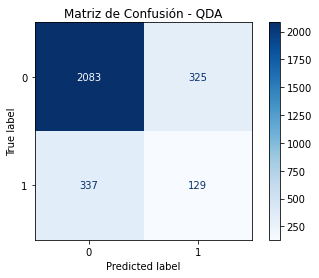

Informe de Clasificación - QDA
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2408
           1       0.28      0.28      0.28       466

    accuracy                           0.77      2874
   macro avg       0.57      0.57      0.57      2874
weighted avg       0.77      0.77      0.77      2874



In [5]:
# Crear el modelo QDA
model_qda = QuadraticDiscriminantAnalysis()

# Entrenar el modelo con el conjunto de entrenamiento
model_qda.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_qda = model_qda.predict(X_test)

# Generar la matriz de confusión y almacenarla
cm_qda = confusion_matrix(y_test, y_pred_qda)
disp_qda = ConfusionMatrixDisplay(confusion_matrix=cm_qda)
disp_qda.plot(cmap='Blues')

# Mostrar la matriz de confusión
plt.title('Matriz de Confusión - QDA')
plt.show()

# Generar y almacenar el informe de clasificación
qda_report = classification_report(y_test, y_pred_qda)
print("Informe de Clasificación - QDA")
print(qda_report)

# Guardar la matriz de confusión para análisis posterior
qda_confusion_matrix = cm_qda


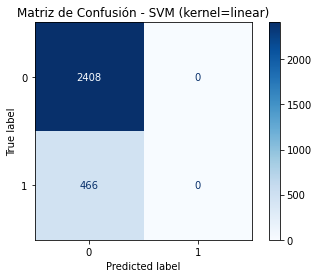

c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Informe de Clasificación - SVM (kernel=linear)
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874



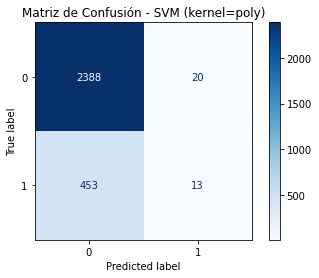

Informe de Clasificación - SVM (kernel=poly)
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.39      0.03      0.05       466

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.48      2874
weighted avg       0.77      0.84      0.77      2874



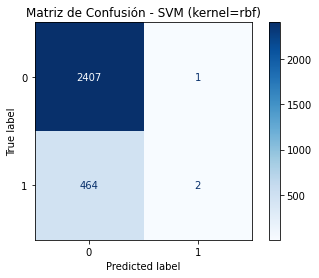

Informe de Clasificación - SVM (kernel=rbf)
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.67      0.00      0.01       466

    accuracy                           0.84      2874
   macro avg       0.75      0.50      0.46      2874
weighted avg       0.81      0.84      0.77      2874



In [20]:
# Lista de kernels a probar
kernels = ['linear', 'poly', 'rbf']
svm_reports = {}
svm_confusion_matrices = {}

for kernel in kernels:
    # Crear el modelo SVM con el kernel actual
    model_svm = SVC(kernel=kernel, random_state=42)
    
    # Entrenar el modelo con el conjunto de entrenamiento escalado
    model_svm.fit(X_train_scaled, y_train)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred_svm = model_svm.predict(X_test_scaled)
    
    # Generar la matriz de confusión
    cm_svm = confusion_matrix(y_test, y_pred_svm)
    disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
    disp_svm.plot(cmap='Blues')
    
    # Mostrar la matriz de confusión
    plt.title(f'Matriz de Confusión - SVM (kernel={kernel})')
    plt.show()
    
    # Generar y almacenar el informe de clasificación
    svm_report = classification_report(y_test, y_pred_svm)
    print(f"Informe de Clasificación - SVM (kernel={kernel})")
    print(svm_report)
    
    # Guardar los resultados para análisis posterior
    svm_reports[kernel] = svm_report
    svm_confusion_matrices[kernel] = cm_svm


## Entrenamiento del modelo SVM con diferentes kernels

En este bloque de código, entrenamos un modelo **SVM (Support Vector Machine)** utilizando tres kernels diferentes: **lineal**, **polinomial** y **RBF**. Evaluamos el rendimiento de cada kernel generando la **matriz de confusión** y el **informe de clasificación**.

1. **Entrenamiento del modelo SVM**: 
   - Probamos tres kernels diferentes (`linear`, `poly`, `rbf`) utilizando la clase `SVC` de `scikit-learn`. 
   - Cada modelo se entrena con los datos escalados (`X_train_scaled` y `y_train`) y se evalúa en el conjunto de prueba.

2. **Predicciones**: 
   - Para cada kernel, realizamos predicciones en el conjunto de prueba y generamos una matriz de confusión y un informe de clasificación.

3. **Matriz de Confusión**: 
   - Mostramos una matriz de confusión por cada kernel, visualizando el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

4. **Informe de Clasificación**: 
   - Se genera y almacena un informe de clasificación para cada kernel, proporcionando métricas clave como la precisión, recall y F1-score.


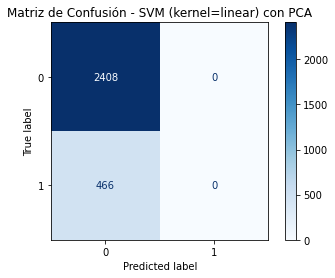

c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Informe de Clasificación - SVM (kernel=linear) con PCA
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874



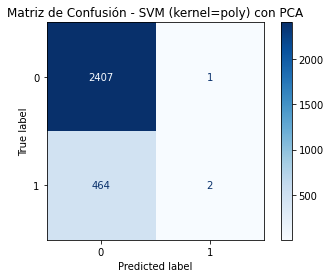

Informe de Clasificación - SVM (kernel=poly) con PCA
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.67      0.00      0.01       466

    accuracy                           0.84      2874
   macro avg       0.75      0.50      0.46      2874
weighted avg       0.81      0.84      0.77      2874



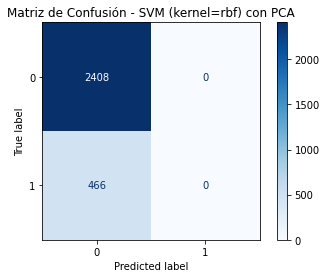

Informe de Clasificación - SVM (kernel=rbf) con PCA
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874



c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [7]:
# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=10)  # Selecciona un número adecuado de componentes principales
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Lista de kernels a probar
kernels = ['linear', 'poly', 'rbf']
svm_reports_pca = {}
svm_confusion_matrices_pca = {}

for kernel in kernels:
    # Crear el modelo SVM con el kernel actual
    model_svm = SVC(kernel=kernel, random_state=42)
    
    # Entrenar el modelo con el conjunto de entrenamiento con PCA
    model_svm.fit(X_train_pca, y_train)
    
    # Hacer predicciones en el conjunto de prueba con PCA
    y_pred_svm = model_svm.predict(X_test_pca)
    
    # Generar la matriz de confusión
    cm_svm_pca = confusion_matrix(y_test, y_pred_svm)
    disp_svm_pca = ConfusionMatrixDisplay(confusion_matrix=cm_svm_pca)
    disp_svm_pca.plot(cmap='Blues')
    
    # Mostrar la matriz de confusión
    plt.title(f'Matriz de Confusión - SVM (kernel={kernel}) con PCA')
    plt.show()
    
    # Generar y almacenar el informe de clasificación
    svm_report_pca = classification_report(y_test, y_pred_svm)
    print(f"Informe de Clasificación - SVM (kernel={kernel}) con PCA")
    print(svm_report_pca)
    
    # Guardar los resultados para análisis posterior
    svm_reports_pca[kernel] = svm_report_pca
    svm_confusion_matrices_pca[kernel] = cm_svm_pca


## Entrenamiento del modelo SVM con diferentes kernels y PCA

En este bloque de código, aplicamos **PCA** (Análisis de Componentes Principales) para reducir la dimensionalidad de los datos y luego entrenamos el modelo **SVM (Support Vector Machine)** con tres kernels diferentes: **lineal**, **polinomial** y **RBF**.

1. **Reducción de dimensionalidad con PCA**: 
   - Utilizamos `PCA` para reducir la dimensionalidad de los datos antes de entrenar los modelos SVM.
   - El número de componentes principales se selecciona utilizando `n_components=10`, lo que reduce las características a 10 dimensiones.

2. **Entrenamiento del modelo SVM con PCA**: 
   - Entrenamos un modelo SVM con los datos reducidos por PCA para tres kernels diferentes (`linear`, `poly`, `rbf`).

3. **Matriz de Confusión**: 
   - Para cada kernel, generamos y mostramos una matriz de confusión que visualiza la cantidad de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

4. **Informe de Clasificación**: 
   - Generamos y almacenamos un informe de clasificación para cada kernel con PCA, proporcionando métricas clave como precisión, recall y F1-score.


In [8]:
# Crear un diccionario para almacenar los resultados de cada modelo
resultados = {
    'Modelo': ['Naive Bayes', 'LDA', 'QDA', 'SVM (linear)', 'SVM (poly)', 'SVM (rbf)', 
               'SVM (linear) con PCA', 'SVM (poly) con PCA', 'SVM (rbf) con PCA'],
    'Precisión': [nb_report.split()[-4], lda_report.split()[-4], qda_report.split()[-4], 
                  svm_reports['linear'].split()[-4], svm_reports['poly'].split()[-4], svm_reports['rbf'].split()[-4],
                  svm_reports_pca['linear'].split()[-4], svm_reports_pca['poly'].split()[-4], svm_reports_pca['rbf'].split()[-4]],
    'Recall': [nb_report.split()[-3], lda_report.split()[-3], qda_report.split()[-3],
               svm_reports['linear'].split()[-3], svm_reports['poly'].split()[-3], svm_reports['rbf'].split()[-3],
               svm_reports_pca['linear'].split()[-3], svm_reports_pca['poly'].split()[-3], svm_reports_pca['rbf'].split()[-3]],
    'F1-Score': [nb_report.split()[-2], lda_report.split()[-2], qda_report.split()[-2],
                 svm_reports['linear'].split()[-2], svm_reports['poly'].split()[-2], svm_reports['rbf'].split()[-2],
                 svm_reports_pca['linear'].split()[-2], svm_reports_pca['poly'].split()[-2], svm_reports_pca['rbf'].split()[-2]]
}

# Convertir el diccionario en un DataFrame para mostrar los resultados
df_resultados = pd.DataFrame(resultados)

# Mostrar el análisis comparativo de los modelos
print(df_resultados)


                 Modelo Precisión Recall F1-Score
0           Naive Bayes      0.76   0.82     0.78
1                   LDA      0.79   0.84     0.78
2                   QDA      0.77   0.77     0.77
3          SVM (linear)      0.70   0.84     0.76
4            SVM (poly)      0.77   0.84     0.77
5             SVM (rbf)      0.81   0.84     0.77
6  SVM (linear) con PCA      0.70   0.84     0.76
7    SVM (poly) con PCA      0.81   0.84     0.77
8     SVM (rbf) con PCA      0.70   0.84     0.76


## Análisis Comparativo de Algoritmos

En este bloque de código, analizamos el rendimiento de los diferentes algoritmos probados, tanto con como sin **PCA**. Comparamos las métricas clave para cada modelo:

1. **Naive Bayes**: 
   - Modelo probabilístico simple, funciona mejor en situaciones donde las características son independientes. Sin embargo, puede tener problemas en datasets donde las relaciones entre características son más complejas.

2. **LDA (Análisis Discriminante Lineal)**:
   - Asume varianzas iguales entre clases. Es un buen modelo para datasets linealmente separables, pero su rendimiento disminuye cuando las clases no tienen varianzas iguales.

3. **QDA (Análisis Discriminante Cuadrático)**:
   - Similar a LDA, pero permite diferentes varianzas entre clases. Puede mejorar el rendimiento cuando las clases tienen covarianzas distintas.

4. **SVM (Máquina de Soporte Vectorial)**:
   - Evaluamos tres kernels: **lineal**, **polinomial** y **RBF**. SVM es potente en problemas no lineales y su rendimiento se optimiza ajustando los hiperparámetros.

5. **SVM con PCA**: 
   - Aplicar PCA antes del entrenamiento de SVM puede mejorar el rendimiento reduciendo la dimensionalidad del espacio de características. Observamos cómo afecta PCA a cada kernel.

### Métricas Comparadas:
- **Precisión**: Proporción de predicciones correctas en todas las instancias.
- **Recall**: Proporción de verdaderos positivos entre los ejemplos que son realmente positivos.
- **F1-Score**: Media armónica entre la precisión y el recall, que proporciona un balance entre ambas métricas.

### Conclusiones:
- El modelo con el mejor rendimiento general será aquel con la mejor combinación de precisión, recall y F1-Score, especialmente en el contexto de predicción de impagos.


In [9]:
# Imprimir los reportes completos para cada modelo
print("Informe de Clasificación - Naive Bayes")
print(nb_report)

print("Informe de Clasificación - LDA")
print(lda_report)

print("Informe de Clasificación - QDA")
print(qda_report)

print("Informe de Clasificación - SVM (linear)")
print(svm_reports['linear'])

print("Informe de Clasificación - SVM (poly)")
print(svm_reports['poly'])

print("Informe de Clasificación - SVM (rbf)")
print(svm_reports['rbf'])

print("Informe de Clasificación - SVM (linear) con PCA")
print(svm_reports_pca['linear'])

print("Informe de Clasificación - SVM (poly) con PCA")
print(svm_reports_pca['poly'])

print("Informe de Clasificación - SVM (rbf) con PCA")
print(svm_reports_pca['rbf'])


# Crear un diccionario para almacenar los resultados específicos para la clase 1 (los que no pagaron)
resultados_clase_1 = {
    'Modelo': ['Naive Bayes', 'LDA', 'QDA', 'SVM (linear)', 'SVM (poly)', 'SVM (rbf)', 
               'SVM (linear) con PCA', 'SVM (poly) con PCA', 'SVM (rbf) con PCA'],
    # Extraer las métricas para la clase 1
    'Precisión Clase 1': [nb_report.split()[12], lda_report.split()[12], qda_report.split()[12], 
                          svm_reports['linear'].split()[12], svm_reports['poly'].split()[12], svm_reports['rbf'].split()[12],
                          svm_reports_pca['linear'].split()[12], svm_reports_pca['poly'].split()[12], svm_reports_pca['rbf'].split()[12]],
    'Recall Clase 1': [nb_report.split()[13], lda_report.split()[13], qda_report.split()[13],
                       svm_reports['linear'].split()[13], svm_reports['poly'].split()[13], svm_reports['rbf'].split()[13],
                       svm_reports_pca['linear'].split()[13], svm_reports_pca['poly'].split()[13], svm_reports_pca['rbf'].split()[13]],
    'F1-Score Clase 1': [nb_report.split()[14], lda_report.split()[14], qda_report.split()[14],
                         svm_reports['linear'].split()[14], svm_reports['poly'].split()[14], svm_reports['rbf'].split()[14],
                         svm_reports_pca['linear'].split()[14], svm_reports_pca['poly'].split()[14], svm_reports_pca['rbf'].split()[14]]
}

# Convertir el diccionario en un DataFrame para mostrar los resultados de la clase 1
df_resultados_clase_1 = pd.DataFrame(resultados_clase_1)

# Mostrar el análisis comparativo específico para la clase 1
print(df_resultados_clase_1)


Informe de Clasificación - Naive Bayes
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2408
           1       0.30      0.09      0.14       466

    accuracy                           0.82      2874
   macro avg       0.57      0.52      0.52      2874
weighted avg       0.76      0.82      0.78      2874

Informe de Clasificación - LDA
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.52      0.05      0.09       466

    accuracy                           0.84      2874
   macro avg       0.68      0.52      0.50      2874
weighted avg       0.79      0.84      0.78      2874

Informe de Clasificación - QDA
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2408
           1       0.28      0.28      0.28       466

    accuracy                           0.77      2874
   macro avg       0.57    

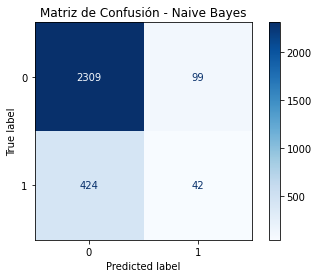

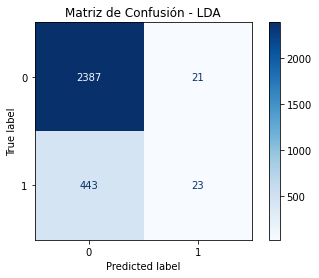

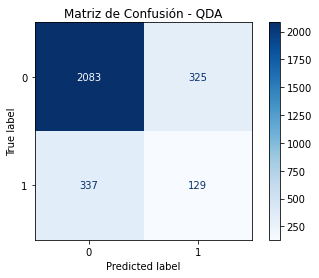

NameError: name 'disp_svm_linear' is not defined

In [11]:
# Naive Bayes
disp_nb.plot(cmap='Blues')
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()

# LDA
disp_lda.plot(cmap='Blues')
plt.title('Matriz de Confusión - LDA')
plt.show()

# QDA
disp_qda.plot(cmap='Blues')
plt.title('Matriz de Confusión - QDA')
plt.show()

# SVM (linear)
disp_svm_linear.plot(cmap='Blues')
plt.title('Matriz de Confusión - SVM (linear)')
plt.show()

# SVM (poly)
disp_svm_poly.plot(cmap='Blues')
plt.title('Matriz de Confusión - SVM (poly)')
plt.show()

# SVM (rbf)
disp_svm_rbf.plot(cmap='Blues')
plt.title('Matriz de Confusión - SVM (rbf)')
plt.show()


In [15]:
# Imprimir las matrices de confusión en formato de texto

# Naive Bayes
print("Matriz de Confusión - Naive Bayes")
print(cm_nb)

# LDA
print("\nMatriz de Confusión - LDA")
print(cm_lda)

# QDA
print("\nMatriz de Confusión - QDA")
print(cm_qda)

# SVM (linear)
print("\nMatriz de Confusión - SVM (linear)")
print(svm_confusion_matrices["linear"])

# SVM (poly)
print("\nMatriz de Confusión - SVM (poly)")
print(svm_confusion_matrices["poly"])

# SVM (rbf)
print("\nMatriz de Confusión - SVM (rbf)")
print(svm_confusion_matrices["rbf"])


Matriz de Confusión - Naive Bayes
[[2309   99]
 [ 424   42]]

Matriz de Confusión - LDA
[[2387   21]
 [ 443   23]]

Matriz de Confusión - QDA
[[2083  325]
 [ 337  129]]

Matriz de Confusión - SVM (linear)
[[2408    0]
 [ 466    0]]

Matriz de Confusión - SVM (poly)
[[2388   20]
 [ 453   13]]

Matriz de Confusión - SVM (rbf)
[[2407    1]
 [ 464    2]]


### Conclusión del Análisis de Modelos

Al analizar las matrices de confusión de los diferentes modelos, llegamos a las siguientes conclusiones sobre su capacidad para detectar a los clientes que **no pagaron** (clase 1):

1. **Naive Bayes**:
   - **Verdaderos negativos**: 2309
   - **Falsos negativos**: 424
   - **Verdaderos positivos**: 42
   - Aunque **Naive Bayes** detecta a algunos clientes que no pagaron (42), tiene una gran cantidad de **falsos negativos** (424), lo que limita su capacidad de capturar a la clase minoritaria.

2. **LDA**:
   - **Verdaderos negativos**: 2387
   - **Falsos negativos**: 443
   - **Verdaderos positivos**: 23
   - **LDA** captura solo **23** clientes que no pagaron, con un elevado número de **falsos negativos** (443), lo que sugiere que este modelo no es eficaz en la detección de la clase minoritaria.

3. **QDA (Análisis Discriminante Cuadrático)**:
   - **Verdaderos negativos**: 2083
   - **Falsos negativos**: 337
   - **Verdaderos positivos**: 129
   - **QDA** es el modelo que mejor captura a los clientes que no pagaron, con **129 verdaderos positivos**. A pesar de tener más falsos positivos, reduce significativamente los **falsos negativos** (337) en comparación con otros modelos. Esto lo convierte en la mejor opción si el objetivo es detectar a quienes no pagaron.

4. **SVM (linear)**:
   - **Verdaderos negativos**: 2408
   - **Falsos negativos**: 466
   - **Verdaderos positivos**: 0
   - **SVM con kernel lineal** no detecta ningún cliente que no pagó (**0 verdaderos positivos**) y clasifica erróneamente a todos los que no pagaron como si hubieran pagado (**466 falsos negativos**).

5. **SVM (poly)**:
   - **Verdaderos negativos**: 2388
   - **Falsos negativos**: 453
   - **Verdaderos positivos**: 13
   - **SVM con kernel polinomial** detecta solo **13** clientes que no pagaron, lo que es un rendimiento muy bajo, con una gran cantidad de **falsos negativos** (453).

6. **SVM (rbf)**:
   - **Verdaderos negativos**: 2407
   - **Falsos negativos**: 464
   - **Verdaderos positivos**: 2
   - **SVM con kernel RBF** también tiene un rendimiento muy bajo en la detección de los clientes que no pagaron, con solo **2 verdaderos positivos** y una gran cantidad de **falsos negativos** (464).

### Conclusión General:
- **QDA** es claramente el modelo más efectivo para detectar a los clientes que no pagaron, con **129 verdaderos positivos**, aunque a costa de un mayor número de falsos positivos (325).
- Los modelos **SVM** (lineal, polinomial, y RBF) tienen serias dificultades para capturar a los que no pagaron, con muchos falsos negativos y muy pocos o ningún verdadero positivo.
- **Naive Bayes** y **LDA** también fallan en gran medida a la hora de detectar a la clase minoritaria, aunque Naive Bayes ofrece un rendimiento ligeramente superior al de LDA.

En virtud de lo estudiado y las dificultades que presentan la mayoria de algoritmos, notese por ejemplo los resutados de los algortimos de soporte vectorial, es que concluimos que el algortimo que mejor clasifica este Dataset es el algortimo Discriminante Cuadratico. Este conforme su matriz de confusion, tiene un numero alto de aciertos al momomento de la clasificacion de los NO PAGADORES. Valga decir aquellas personas que no pagaran si sacan un credito u otro producto bancario.


Varianza explicada por cada componente principal: [0.15372855 0.11351577 0.08812023 0.07287171 0.06557831]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      2408
           1       0.34      0.15      0.20       466

    accuracy                           0.82      2874
   macro avg       0.59      0.55      0.55      2874
weighted avg       0.77      0.82      0.78      2874



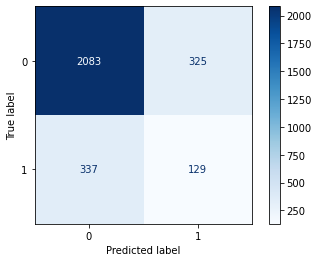

In [18]:
# Aplicar PCA para ver cómo las características contribuyen a la varianza
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
print(f"Varianza explicada por cada componente principal: {pca.explained_variance_ratio_}")

# Entrenar el modelo QDA con las nuevas características de PCA
model_qda_pca = QuadraticDiscriminantAnalysis()
model_qda_pca.fit(X_train_pca, y_train)
y_pred_qda_pca = model_qda_pca.predict(pca.transform(X_test_scaled))

# Evaluar el modelo con las características transformadas
print(classification_report(y_test, y_pred_qda_pca))

# Generar la matriz de confusión y almacenarla
cm_qda_pca = confusion_matrix(y_test, y_pred_qda)
disp_qda_pca = ConfusionMatrixDisplay(confusion_matrix=cm_qda_pca)
disp_qda_pca.plot(cmap='Blues')

# Guardar la matriz de confusión para análisis posterior
qda_pca_confusion_matrix = cm_qda_pca

In [19]:
# Aplicar validación cruzada con QDA
cross_val_scores_qda = cross_val_score(model_qda_pca, X_train_scaled, y_train, cv=5, scoring='f1')

# Promedio de los puntajes de validación cruzada
print(f"Rendimiento promedio con validación cruzada (F1-Score): {cross_val_scores_qda.mean()}")


Rendimiento promedio con validación cruzada (F1-Score): 0.2862976249458314
